# Initializing PRAW and Retrieving Reddit Data

In [1]:
# This command installs the PRAW (Python Reddit API Wrapper) library.
!pip install praw

   ---------------------------------------- 0.0/191.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/191.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/191.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/191.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/191.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/191.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/191.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/191.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/191.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/191.0 kB ? eta -:--:--
   -------- ------------------------------ 41.0/191.0 kB 960.0 kB/s eta 0:00:01
   ---------------------------------- ----- 163.8/191.0 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 191.0/191.0 kB 1.6 MB/s eta 0:00:00


# Reddit API Wrapper Configuration

In [2]:
# Reddit API wrapper
import praw
# Set up Reddit API credentials
user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="D87PHt7RBWFy1jf1-EquRw",
    client_secret="CxCt7CzuY0w7YostkdaY9kBB2h4NRg",
    user_agent=user_agent
)

# Libraries for Data Manipulation and Numerical Computing

In [3]:
# Data manipulation library
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

# Reddit Submission Data Collection and Analysis

In [4]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Bitcoin Newcomers FAQ - Please read!
1bg5lv0
BitcoinFan7
1710594154.0
90
0.95
https://www.reddit.com/r/Bitcoin/comments/1bg5lv0/bitcoin_newcomers_faq_please_read/
0


# Get total comment in Subreddit

In [5]:
# Fetching data from the 'bitcoin' subreddit
headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

653


# Reddit Submission Data Collection and Analysis

In [6]:
#Create a dataframe from the scrapped data 
bitcoin_df = pd.DataFrame(headlines)
# Display the first few rows of the DataFrame
bitcoin_df.head()

,0
0,Peter Schiff doesn’t understand the basic supp...
1,Until next time let's continue to enjoy the mo...
2,Question about the random-number in mining
3,If I was on Wall Street after halving...
4,"Best place to easily buy small, frequent Bitco..."


In [9]:
# Display the column names of the DataFrame
bitcoin_df.columns

RangeIndex(start=0, stop=1, step=1)

In [10]:
 # Rename the column to 'Titles'
bitcoin_df.columns = ['Titles']

In [11]:
bitcoin_df.head()

,Titles
0,Peter Schiff doesn’t understand the basic supp...
1,Until next time let's continue to enjoy the mo...
2,Question about the random-number in mining
3,If I was on Wall Street after halving...
4,"Best place to easily buy small, frequent Bitco..."


In [12]:
bitcoin_df.Titles.duplicated().sum() 

0

# Text Cleaning Function

In [13]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(cleanTxt)

#Show the clean text
bitcoin_df.head()

,Titles
0,Peter Schiff doesn’t understand the basic supp...
1,Until next time let's continue to enjoy the mo...
2,Question about the random-number in mining
3,If I was on Wall Street after halving...
4,"Best place to easily buy small, frequent Bitco..."


# Function to Remove Emojis and Unicode Characters

In [14]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(remove_emoji)

#Show the clean text
bitcoin_df.head()

,Titles
0,Peter Schiff doesn’t understand the basic supp...
1,Until next time let's continue to enjoy the mo...
2,Question about the random-number in mining
3,If I was on Wall Street after halving...
4,"Best place to easily buy small, frequent Bitco..."


In [2]:
# Install TextBlob package for sentiment analysis
!pip install textblob

# Sentiment Analysis

In [16]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

# Functions for Subjectivity and Polarity Analysis


In [17]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
bitcoin_df['Subjectivity'] = bitcoin_df['Titles'].apply(getSubjectivity)
bitcoin_df['Polarity'] = bitcoin_df['Titles'].apply(getPolarity)

#Now display data
bitcoin_df.head()

,Titles,Subjectivity,Polarity
0,Peter Schiff doesn’t understand the basic supp...,0.125000,0.000000
1,Until next time let's continue to enjoy the mo...,0.250000,0.200000
2,Question about the random-number in mining,0.000000,0.000000
3,If I was on Wall Street after halving...,0.000000,0.000000
4,"Best place to easily buy small, frequent Bitco...",0.458333,0.320833


# Function to Categorize Polarity Scores

In [18]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
bitcoin_df["Insight"] = bitcoin_df["Polarity"].apply(getInsight)

bitcoin_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Peter Schiff doesn’t understand the basic supp...,0.125000,0.000000,Neutral
1,Until next time let's continue to enjoy the mo...,0.250000,0.200000,Positive
2,Question about the random-number in mining,0.000000,0.000000,Neutral
3,If I was on Wall Street after halving...,0.000000,0.000000,Neutral
4,"Best place to easily buy small, frequent Bitco...",0.458333,0.320833,Positive
5,Those who HODL deserve what they get...,0.000000,0.000000,Neutral
6,Lump Sum Day,0.000000,0.000000,Neutral
7,What's the maxi case?,0.000000,0.000000,Neutral
8,BTC on Robinhood,0.000000,0.000000,Neutral
9,Mined bitcoin for maybe 2 days in 2010,0.000000,0.000000,Neutral


# Data Visualization

In [19]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

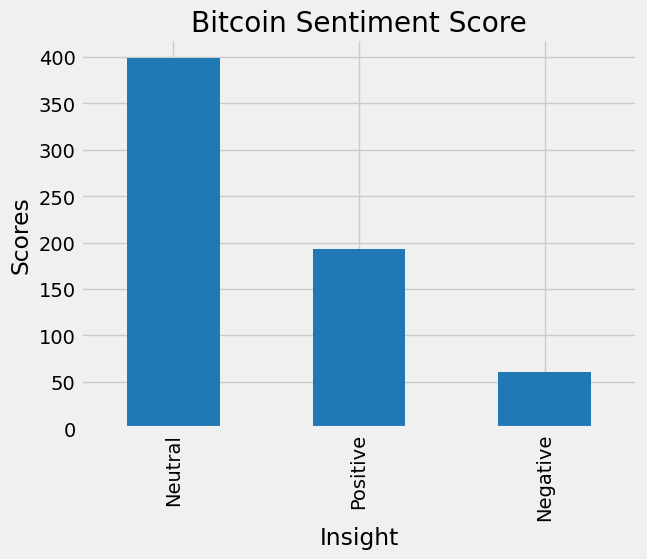

In [20]:
#Plot the values count of sentiment
plt.title("Bitcoin Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
bitcoin_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# Wordcloud

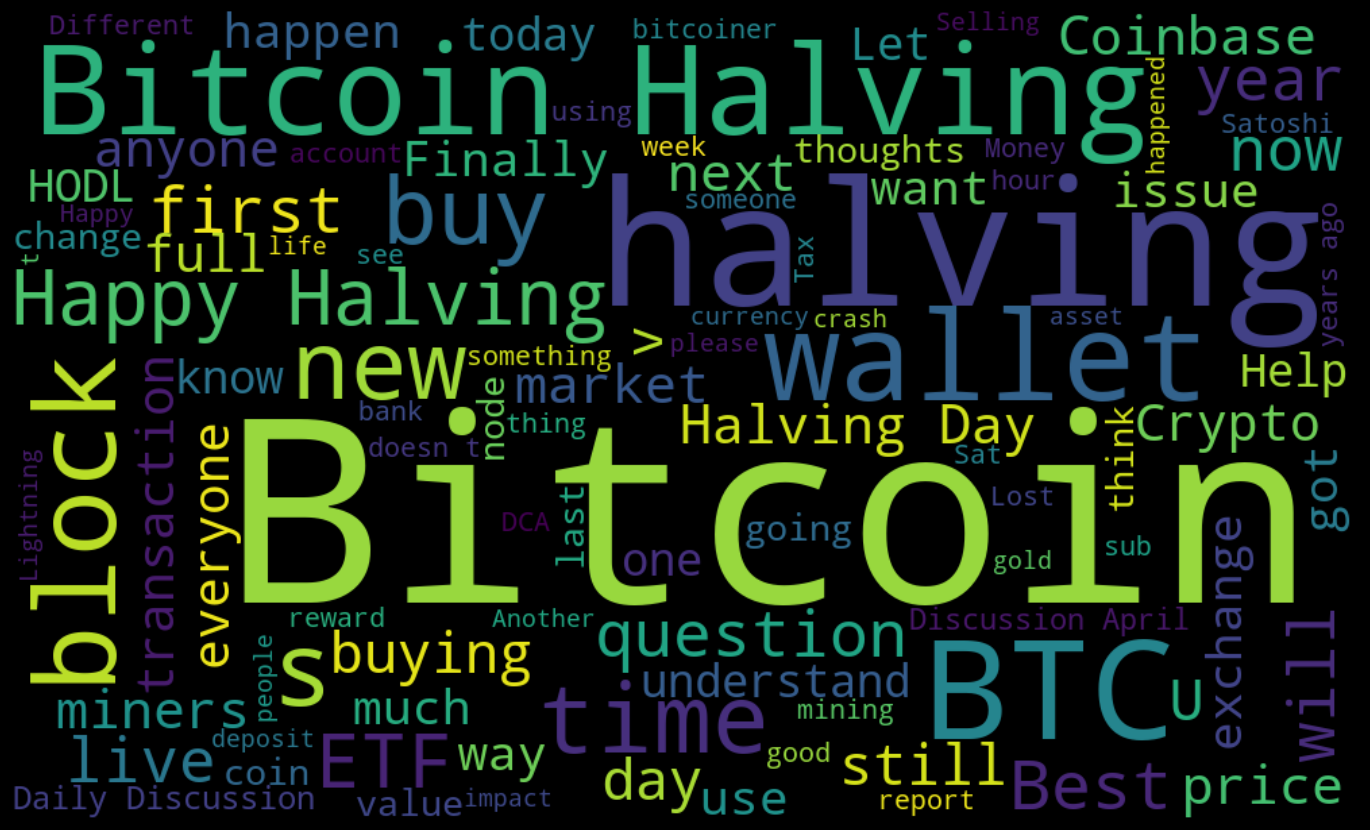

In [21]:
text = ' '.join( [twts for twts in bitcoin_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");